# **Clustering : Mall Customer Segmentation**


# **Problem Statement**

Customers who come for shopping in a mall can be grouped in a number of ways. Shopping pattern, spending pattern, shopping score, salary etc are some of the factors that can be used to divide the customers into different categories.

The reason for these clusters is to help identify those customers who would be interested in certain products, offers and services. The store may strategize its offerings in such a way that it targets only right customers for specific products. This helps in creating a win-win situation for both the store (in
terms of revenue and more customers through customer recommendation) and the customer (discounts, offers, reward points, gifts, etc)

# **Business Objective**

To create Customer cluster to identify the different
types of customers

# **Data Dictionary: MallCustomer Data**

The customer dataset has about 100 records in a CSV format.

S. No.  Feature Data Type Description

1       Customer Id Numeric Customer unique identification number

2       Gender Character Gender of the customer

3       Age Numeric Age of the customer

4 Annual Income (k$) Numeric Annual income of the customer

5 Spending Score (1-100) Numeric Spending scores by customer

# **Technical Goals**

● Understand the data very well. Do all transformations / data engineering / etc. wherever applicable

● Perform Exploratory Data Analysis (EDA)

● Carry out all the Data mining tasks

● Identify the salient features that will determine the best results

● Perform the model evaluation to select the appropriate algorithms


# **Importing required liabraries**

In [ ]:
import numpy as np                                                                         # working with arrays
import pandas as pd                                                                        # loading the dataset
import matplotlib.pyplot as plt                                                            # visualization
import matplotlib
import seaborn as sb                                                                       # visualization and correlation
from numpy import mean
from numpy import std

from sklearn import preprocessing                                                          # data preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler    # data scaling
from sklearn.model_selection import train_test_split,StratifiedKFold,KFold,LeaveOneOut,RepeatedStratifiedKFold     # data splitting
from sklearn.preprocessing import OneHotEncoder                                            # Feature Engineering

# model building liabraries
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# model evaluation
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn import metrics

# filtering warnings
import warnings
warnings.filterwarnings('ignore')

# **Step 1 : Data Collection**

In [ ]:
# Reading CSV train data file into DataFrame

from google.colab import files
upload = files.upload()

Saving DS3_C6_S3_MallCustomers_Data_Project.csv to DS3_C6_S3_MallCustomers_Data_Project (1).csv


In [ ]:
customers_data = pd.read_csv("DS3_C6_S3_MallCustomers_Data_Project.csv")

In [ ]:
# previewing the data

customers_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Step 2 : Data Exploration**

## **1) Finding the information about the dataset**

In [ ]:
# shape of the dataset

print('Number of rows in data is {}.'.format(customers_data.shape[0]))
print('Number of columns in data is {}.'.format(customers_data.shape[1]))

Number of rows in data is 200.
Number of columns in data is 5.


In [ ]:
# Columns in the dataframe

customers_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
# information about the dataset

customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# exploring the existing data types

customers_data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
# exploring the numeric data types

customers_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [ ]:
# exploring the strings

df_string=customers_data.select_dtypes(exclude=[np.number])
df_string.head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female


In [ ]:
# checking missing values in data

customers_data.isnull().sum()    # isnull returns the True/False dataframe
                                 #sum: counts the number of True in columns

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


### Interpretation: There are no any missing value in dataset

In [ ]:
# Seprating out the categorical and continuous variables

def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                # looping on the number of columns
        if df[column].nunique() < 30:        # nunique:  returns unique values in the column,
                                             #here 30 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)

    return categorical, continuous


categorical, continuous = seprate_data_types(customers_data)     # Calling the function

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical    continuous
-------------  ----------------------
Gender         CustomerID
               Age
               Annual Income (k$)
               Spending Score (1-100)


## **2) Exploratory Data Analysis**

Exploratory Data Analysys(EDA) is conducted to gain valuable insights and patterns from the dataset. Through visualizations and statistical analysis we can identify correlations between features and target variable, detecting the outliers and explore relationship within the data. I will perform Exploratory Data Analysis by using Data Visualization Tool (Tableu)

# **Step 3 : Data Preparation**

## **3.1) Missing Value Treatment¶**

It is observed during Data Exploration that, there are no any missing values in the data.Data is clean.

## **3.2) Feature Engineering - Handling Categoroical Features**

In [ ]:
# removing 'CustomerId' column

customers_data.drop(columns=['CustomerID'],inplace=True)

In [ ]:
# creating copy of dataframe

df_encoded  = customers_data.copy()

In [ ]:
# creating list of categorical columns

categorical_attributes = df_encoded.select_dtypes(include='object').columns

print(categorical_attributes)

Index(['Gender'], dtype='object')


## **3.2.1) One Hot Encoding**

In one-hot encoding each unique category or label within a categorical feature is transformed into a binary (0 or 1) feature column. For each category, a new binary column is created, and it is marked with a 1 if the original feature belongs that category and 0 if doesn'

In [ ]:
# Encoding Gender
Gender_dummies = pd.get_dummies(df_encoded.Gender, prefix="Gender")
df_with_dummies = pd.concat([df_encoded,Gender_dummies],axis='columns')
df_with_dummies.drop('Gender',axis='columns',inplace=True)

# Previewing dataframe
print(df_with_dummies)


     Age  Annual Income (k$)  Spending Score (1-100)  Gender_Female  \
0     19                  15                      39              0   
1     21                  15                      81              0   
2     20                  16                       6              1   
3     23                  16                      77              1   
4     31                  17                      40              1   
..   ...                 ...                     ...            ...   
195   35                 120                      79              1   
196   45                 126                      28              1   
197   32                 126                      74              0   
198   32                 137                      18              0   
199   30                 137                      83              0   

     Gender_Male  
0              1  
1              1  
2              0  
3              0  
4              0  
..           ...  
195           

## **3.2.2) Ordinal Encoding**

Ordinal Encoding is a technique for encoding categorical data where the categories have a meaningful order or ranking. Unlike Label encoding, Here you can specify the specific order for your column values. Since we dont have any categorical attribute with ranking we will see this method on sample dataframe.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# Sample data
data = pd.DataFrame({'Size': ['Small', 'Medium', 'Large', 'Medium', 'Small']})

# Define the custom order of labels
custom_order = ['Small', 'Medium', 'Large']

# Initialize the OrdinalEncoder with the custom order
encoder = OrdinalEncoder(categories=[custom_order])

# Fit and transform the data
encoded_data = encoder.fit_transform(data[['Size']])

# Add the encoded values to the DataFrame
data['Encoded_Size'] = encoded_data

# Display the DataFrame with ordinal encoding
print(data)


     Size  Encoded_Size
0   Small           0.0
1  Medium           1.0
2   Large           2.0
3  Medium           1.0
4   Small           0.0


## **3.2.3) MultiLabel Binarizer**

The MultiLabelBinarizer in scikit-learn is a preprocessing tool used to convert a list of multilabels (in the form of lists or sets) into a binary matrix where each label is treated as a separate binary feature. This is often used in multi-label classification tasks, where a data point can belong to multiple categories simultaneously.

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
# Sample data
labels = [('A', 'B'), ('B', 'C'), ('A', 'C'), ('D', 'E')]

# Initialize the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the data using the binarizer
binary_data = mlb.fit_transform(labels)

# Convert the binary data to a DataFrame for better visualization
binary_df = pd.DataFrame(binary_data, columns=mlb.classes_)

# Display the DataFrame with the binary matrix
print(binary_df)

   A  B  C  D  E
0  1  1  0  0  0
1  0  1  1  0  0
2  1  0  1  0  0
3  0  0  0  1  1


## **3.2.4) Count/Frequency Encoding**

In [ ]:
# Perform count encoding
count_encoding = df_encoded['Gender'].value_counts().to_dict()

# Map the counts to the original data
df_encoded['Gender_Count'] = df_encoded['Gender'].map(count_encoding)

# Display the DataFrame with count encoding
print(df_encoded)

     Gender  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Count
0      Male   19                  15                      39            88
1      Male   21                  15                      81            88
2    Female   20                  16                       6           112
3    Female   23                  16                      77           112
4    Female   31                  17                      40           112
..      ...  ...                 ...                     ...           ...
195  Female   35                 120                      79           112
196  Female   45                 126                      28           112
197    Male   32                 126                      74            88
198    Male   32                 137                      18            88
199    Male   30                 137                      83            88

[200 rows x 5 columns]


## **3.2.5) Target Guided Ordinal Encoding**

In [ ]:
"""On sample data"""


# Sample data
data = pd.DataFrame({
 'City': ['A', 'B', 'A', 'C', 'B', 'C', 'A'],
 'Target': [0, 1, 1, 0, 1, 0, 1]
})

# Calculate the mean target value for each category
mean_target = data.groupby('City')['Target'].mean().sort_values()

# Create a mapping based on the sorted means
mapping = {city: rank for rank, city in enumerate(mean_target.index)}

# Map the categories to their corresponding rank
data['City_Rank'] = data['City'].map(mapping)

# Display the DataFrame with target-guided ordinal encoding
print(data)

  City  Target  City_Rank
0    A       0          1
1    B       1          2
2    A       1          1
3    C       0          0
4    B       1          2
5    C       0          0
6    A       1          1


In this code:

We have a sample DataFrame data with two columns: 'City' as the categorical feature and 'Target' as the target variable (binary in this case).

We calculate the mean target value for each category in the 'City' column using groupby and mean.

We sort the categories based on their mean target values.

We create a mapping between the original categories and their corresponding rank based on the sorted order of mean target values.

We use the map function to replace the original 'City' column with the ordinal values obtained from the target guided encoding, creating a new column 'City_Rank.'

## **3.2.6) Label Encoding**

Label Encoding is another technique for converting categorical data into a numerical format. Unlike one-hot encoding, where each category becomes its own binary feature column, label encoding assigns a unique integer to each category. And it gives the labels based on sort order.



In [ ]:
# creating copy of dataframe
df_encoded = customers_data.copy()

In [ ]:

# Label encoding

print(categorical_attributes)

#label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

for i in categorical_attributes:
    df_encoded[i] = label_encoder.fit_transform(df_encoded[i])
    print(f"Unique values in {i} are {df_encoded[i].unique()}")

print(df_encoded.head())

Index(['Gender'], dtype='object')
Unique values in Gender are [1 0]
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       1   19                  15                      39
1       1   21                  15                      81
2       0   20                  16                       6
3       0   23                  16                      77
4       0   31                  17                      40


## **3.3) Feature Scaling**

Imagine you are making a cake, and you have two main ingredients: flour and sugar. Flour is measured in grams, while sugar is measured in milligrams. If you mix these ingredients as they are, your cake will either be too sugary or too floury because their scales are vastly different, you can't even taste that, right. To make a perfect cake, you scale both ingredients to the same unit, like grams. Well, Feature Scaling does something similar for data in machine learning.

Similarly, Feature scaling is a data preprocessing technique used to transform the values of features or variables in a dataset to a similar scale. The purpose is to ensure that all features contribute equally to the model and to avoid the domination of features with larger values.

**When to use Feature Scaling**

However, Not all algorithms require the feature scaling. Some machine learning algorithms are sensitive to feature scaling, while others are insensitive. Machine Learning Algorithms that use gradient descent as an optimization technique require data to be scaled.

**Types of Feature Scaling**

Standardization/StandardScaler

Normalization/MinMaxScaler

MaxAbsScaler

In [ ]:
# Defining input

X = df_encoded.copy()

## **3.3.1) Standardization**

We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero. Main 0 mean, and variance 1. z=(x-x_mean)/std

In [ ]:
# Create copy of encoded data

df_scaled_standard = df_encoded

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Specify Feature columns
feature_columns = X.columns

# Fit and transform the selected feature columns using the scaler
df_scaled_standard[feature_columns] = scaler.fit_transform(df_scaled_standard[feature_columns])

# Display the DataFrame with standardized features
print(df_scaled_standard[feature_columns].head())

     Gender       Age  Annual Income (k$)  Spending Score (1-100)
0  1.128152 -1.424569           -1.738999               -0.434801
1  1.128152 -1.281035           -1.738999                1.195704
2 -0.886405 -1.352802           -1.700830               -1.715913
3 -0.886405 -1.137502           -1.700830                1.040418
4 -0.886405 -0.563369           -1.662660               -0.395980


## **3.3.2) Normalization / Min Max Scaling**

Min Max Scaling scales the values between 0 to 1. X_scaled = (X - X.min / (X.max - X.min)

In [ ]:
min_max=MinMaxScaler()
df_scaled_minmax=pd.DataFrame(min_max.fit_transform(X),columns=X.columns)
df_scaled_minmax.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959


## **3.3.3) Max Abs Scaler**

The MaxAbsScaler is another data preprocessing technique, similar to the StandardScaler, but it scales each feature by dividing it by its maximum absolute value. This approach is useful when you want to preserve the sparsity of thedata, making it suitable for data with outliers or sparse features.

In [ ]:
# Create copy of encoded data

df_scaled_MaxAbs = df_encoded.copy()

In [ ]:
# Initialize the MaxAbsScaler
scaler = MaxAbsScaler()

# Fit and transform the selected feature columns using the scaler
df_scaled_MaxAbs[feature_columns] = scaler.fit_transform(df_scaled_MaxAbs[feature_columns])

# Display the DataFrame with the scaled features
print(df_scaled_MaxAbs[feature_columns].head())

     Gender       Age  Annual Income (k$)  Spending Score (1-100)
0  1.000000 -0.637239           -0.596023               -0.227642
1  1.000000 -0.573034           -0.596023                0.626016
2 -0.785714 -0.605136           -0.582941               -0.898374
3 -0.785714 -0.508828           -0.582941                0.544715
4 -0.785714 -0.252006           -0.569859               -0.207317


## **3.3.4) Robust Scaler**

It is used to scale the feature to median and quantiles Scaling using median and quantiles consists of substracting the
median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the
difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9 1-10 precentile---10% of all values in this group is less
than 1 4-40%

In [ ]:
scaler=RobustScaler()
df_scaled_robust=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
df_scaled_robust.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,-0.839506,-1.273973,-0.287582
1,1.0,-0.740741,-1.273973,0.810458
2,0.0,-0.790123,-1.246575,-1.150327
3,0.0,-0.641975,-1.246575,0.705882
4,0.0,-0.246914,-1.219178,-0.261438


## **3.4) Feature Selection**

In [ ]:
# Finding correlation among numerical features, based on their strong relation we can choose the importatnt features

corr=df_scaled_standard.corr()
corr.style.background_gradient(cmap='coolwarm')

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


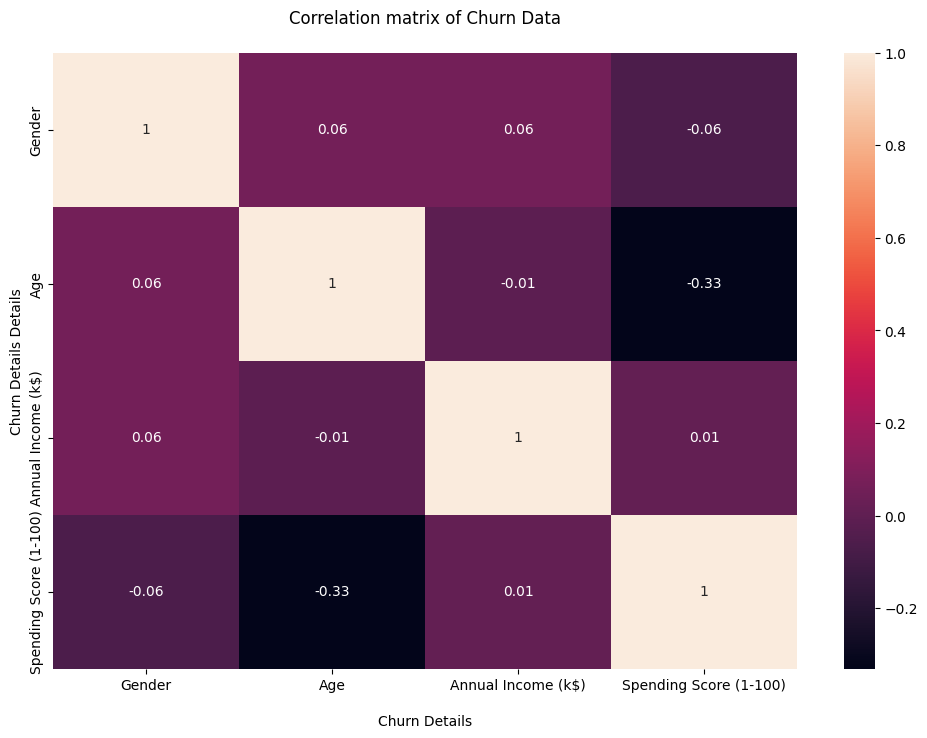

In [ ]:
# Finding correlation among numerical features, using heatmap
plt.figure(figsize=(12,8))
hm = sb.heatmap(round(df_scaled_standard.corr(),2), annot = True)
hm.set(xlabel='\nChurn Details', ylabel='Churn Details Details', title = "Correlation matrix of Churn Data\n")
plt.show()

## **3.5) Dimensionality Reduction Using PCA and LDA**

Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA) are two dimensionality reduction techniques that are commonly used in machine learning. They both work by projecting data onto a lower-dimensional space, but they have different goals.

PCA is a way to reduce the number of features in a dataset while still preserving most of the information. It does this by finding new features that are linear combinations of the original features. These new features are called principal components, and they are ordered by importance. The first principal component is the most important, and it captures the most variation in the data. The second principal component is the next most important, and it captures the next most variation in the data, and so on.

LDA is similar to PCA, but it takes into account the class labels of the data. This means that LDA can find new features that are specifically useful for distinguishing between the different classes. LDA is often used in machine learning for classification tasks.

In general, PCA is a good choice for dimensionality reduction when the goal is to preserve as much of the information as possible. LDA is a good choice for dimensionality reduction when the goal is to specifically improve the performance of a machine learning classifier.

## **3.5.1) Principal Component Analysis**

In [ ]:
#PCA

from sklearn.decomposition import PCA

var_ratio={}
for i in range(2,df_scaled_standard.shape[1]+1):
    pca=PCA(n_components=i)
    pca.fit(df_scaled_standard)
    var_ratio[i]=sum(pca.explained_variance_ratio_)

In [ ]:
var_ratio

{2: 0.5992069019819846, 3: 0.831813287884595, 4: 0.9999999999999999}

The n_components parameter specifies the number of principal components to retain after dimensionality reduction.or each value of n_components, the code fits a PCA model to the data and computes the explained variance ratio of the retained principal components. The explained variance ratio of a principal component is the proportion of the total variance in the data that is explained by that component.

The code then stores the sum of the explained variance ratios of the retained principal components in a dictionary called var_ratio. The significance of var_ratio is that it tells us how much of the total variance in the data is explained by the first n_components principal components.

This output tells us that the first two principal components explain 724% of the total variance in the data, the first three principal components explain 91% of the total variance, and so on.

The var_ratio dictionary can be used to choose the optimal value of the n_components parameter for a PCA model. For example, if we want to retain a model that explains at least 90% of the total variance in the data, we would choose the value of n_components that corresponds to a value of var_ratio that is greater than or equal to 0.90.



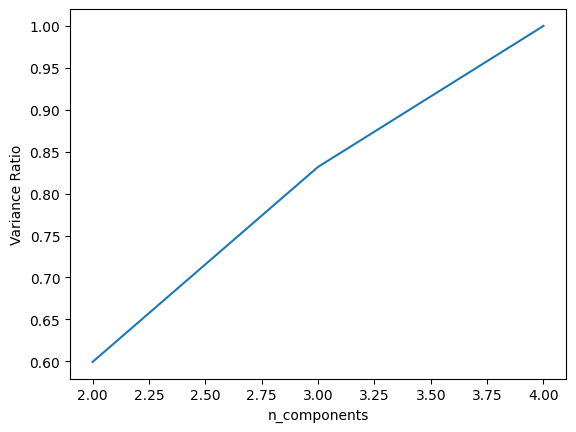

In [ ]:
#  plot of n_components vs variance ratio

pd.Series(var_ratio).plot(kind='line')
plt.xlabel('n_components')
plt.ylabel('Variance Ratio')
plt.show()

It is often the case that the variance ratio increases rapidly at first, and then plateaus or even decreases as more components are added. This is because the first few components typically capture the most important information in the data, while the later components capture less important information and noise.

In [ ]:
# Create a PCA model with 3 components.
pca = PCA(n_components=3)

# Fit the PCA model to the data.
data1 = pca.fit(df_scaled_standard)

# Calculate the explained variance ratio of the PCA model.
var_ratio = sum(data1.explained_variance_ratio_)

# Print the explained variance ratio to the console.
print('var_ratio :', var_ratio)

# Transform the data using the PCA model.
data2 = pca.fit_transform(X)

# Store the transformed data in a Pandas DataFrame.
pca_df = pd.DataFrame(data2)

# Print the Pandas DataFrame to the console.
pca_df

var_ratio : 0.831813287884595


,0,1,2
0,-31.869945,-33.001252,-22.142987
1,0.764494,-56.842901,-10.542634
2,-57.408276,-13.124961,-28.750964
3,-2.168543,-53.478590,-9.511588
4,-32.174085,-30.388412,-10.225069
...,...,...,...
195,58.352515,31.017542,3.200135
196,19.908001,66.446108,1.242664
197,58.520804,38.346039,-0.834218
198,20.979130,79.376405,-13.645474


# **Step 4 : Model Building**

Clustering groups data into various clusters with respect to similarities among data objects (eg people,products, or places) and share similar characteristics in the same cluster.

It is Unsupervised Machine Learning algorithm where only input data is available. There are three main types of clustering techniques: partitioning, density-based, and hierarchical:

**Partitioning clustering** algorithms work by dividing the data into a predefined number of clusters. These algorithms are typically fast and efficient, but they can be sensitive to the initialization of the clusters. Some popular partitioning clustering algorithms include:

1. K-means clustering: This algorithm works by randomly initializing the
cluster centroids and then iteratively assigning data points to the cluster with the nearest centroid. The centroids are then updated based on the assigned data points, and the process is repeated until convergence.
2. Medoids clustering: This algorithm is similar to k-means clustering, but instead of assigning data points to the cluster with the nearest centroid, data points are assigned to the cluster with the nearest medoid. A medoid is a data point that is centrally located within its cluster.

**Density-based clustering** algorithms group data points together based on their density. These algorithms are good at finding clusters of arbitrary shape and size, but they can be computationally expensive. Some popular density-based clustering algorithms include:

1. DBSCAN (Density-Based Spatial Clustering of Applications with Noise): This algorithm works by identifying core points, which are data points that have a certain number of neighboring data points within a certain distance. Core points and their neighbors are grouped together to form a cluster.

2. OPTICS (Ordering Points to Identify Clustering Structure): This algorithm works by assigning a reachability distance to each data point. The reachability distance is the minimum distance to a core point, or the distance to the core point if the data point is a core point itself. OPTICS then uses the reachability distances to order the data points. The ordering can then be used to identify clusters.

**Hierarchical clustering** algorithms build a hierarchy of clusters. These algorithms are robust to the initialization of the clusters, but they can be slow for large datasets. Some popular hierarchical clustering algorithms include:

1. Agglomerative clustering :  It works by starting with each data point as its own cluster, and then iteratively merging the two closest clusters until all of the data points have been merged into a single cluster. The algorithm uses a linkage criterion to determine which clusters to merge at each iteration.
2. Divisive clustering is a type of hierarchical clustering algorithm that works in the opposite way of agglomerative clustering. It starts with all of the data points in a single cluster, and then iteratively splits the clusters into smaller sub-clusters until all of the data points are in their own clusters. The algorithm uses a splitting criterion to determine which clusters to split at each iteration.

The choice of clustering technique depends on the specific task at hand. If we need a fast and efficient algorithm, partitioning clustering is a good option. If we need to find clusters of arbitrary shape and size, a density-based clustering algorithm is a good option. If we need an algorithm that is robust to the initialization of the clusters, a hierarchical clustering algorithm is a good option.

## **4.2) Agglomerative clustering**

In [ ]:
# Load the values of the PCA DataFrame into a NumPy array.
X = pca_df.values

# Preview an array
X

array([[-3.18699448e+01, -3.30012521e+01, -2.21429871e+01],
       [ 7.64494048e-01, -5.68429006e+01, -1.05426336e+01],
       [-5.74082757e+01, -1.31249607e+01, -2.87509637e+01],
       [-2.16854252e+00, -5.34785900e+01, -9.51158805e+00],
       [-3.21740846e+01, -3.03884119e+01, -1.02250687e+01],
       [-2.17695183e+00, -5.22272685e+01, -1.07091371e+01],
       [-5.90656895e+01, -9.54376302e+00, -1.41418144e+01],
       [ 1.23708622e+01, -6.16180208e+01, -5.59301276e+00],
       [-6.63157690e+01, -3.21423160e+00,  1.33986279e+01],
       [-5.65556212e+00, -4.72672225e+01, -3.83186657e+00],
       [-5.82365979e+01, -9.13418751e+00,  1.88466642e+01],
       [ 1.46218043e+01, -6.21075685e+01,  7.24027620e+00],
       [-5.51608374e+01, -1.00799251e+01,  1.03216998e+01],
       [-3.02878330e-03, -5.01140754e+01, -8.51632177e+00],
       [-5.27646657e+01, -1.16807468e+01, -1.05739172e+01],
       [ 1.94661180e+00, -5.15222086e+01, -1.00015640e+01],
       [-3.45055496e+01, -2.37615402e+01

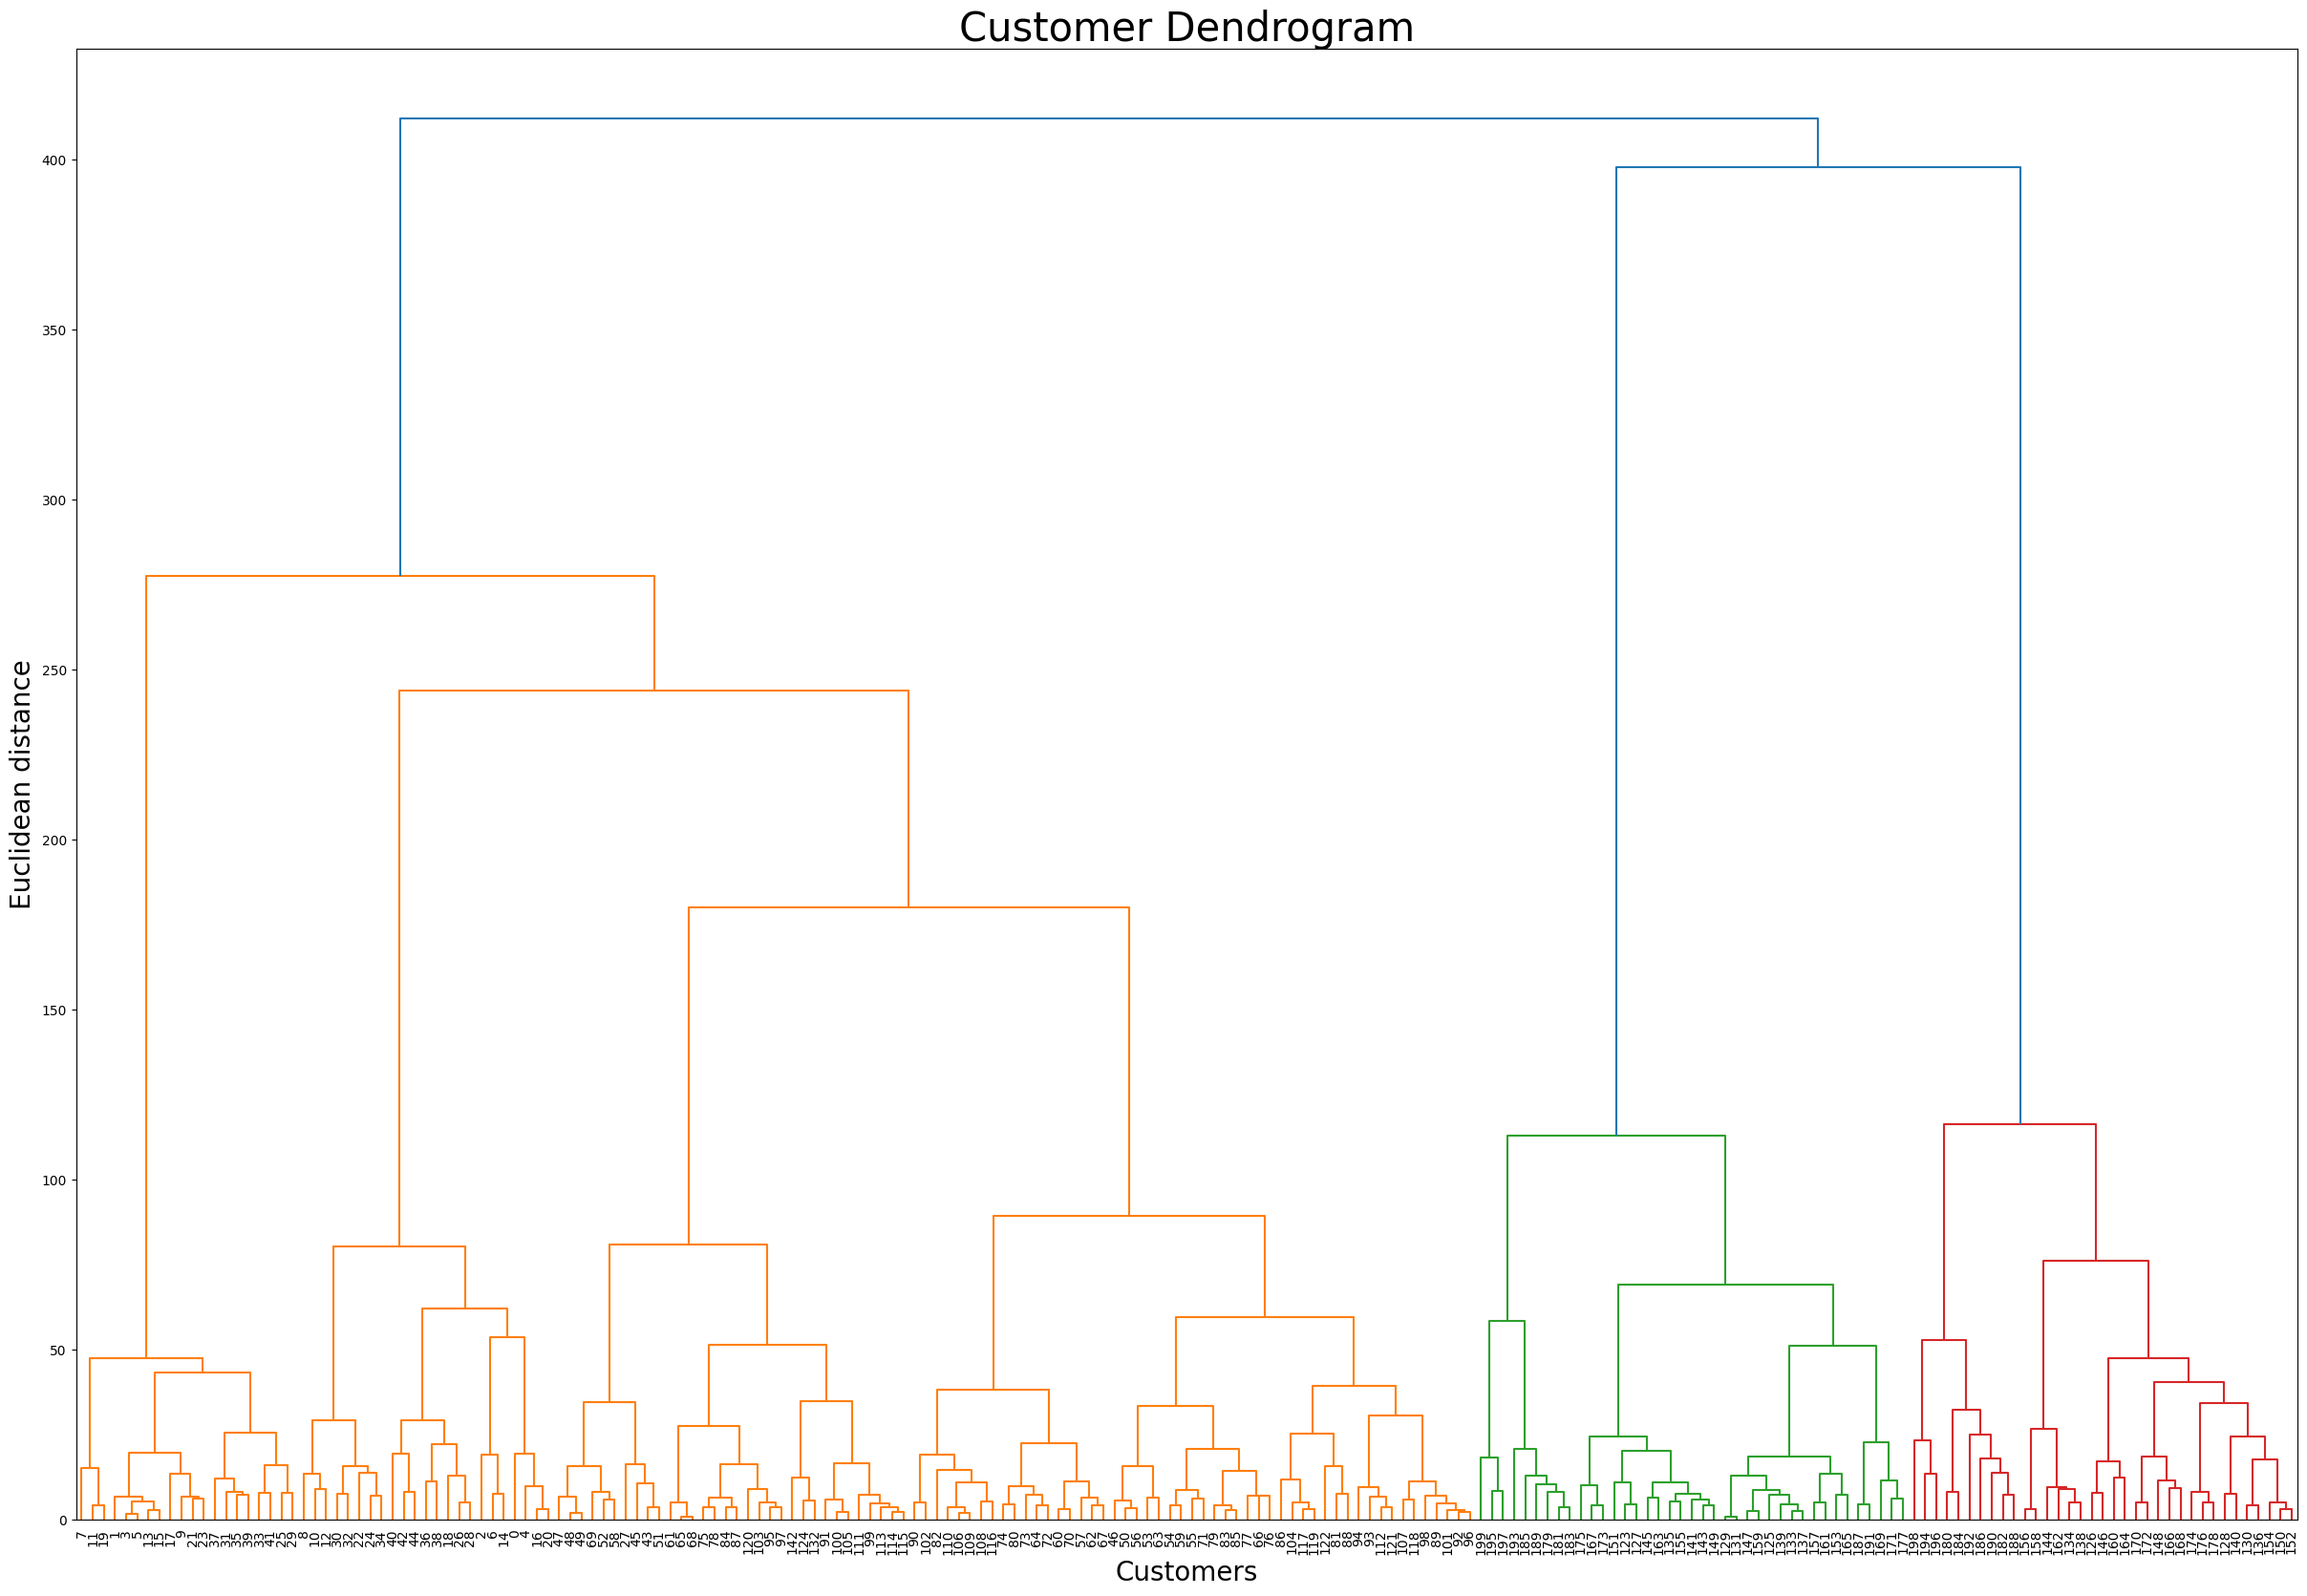

In [ ]:
# Create a Matplotlib figure with a size of 30 inches by 20 inches.
plt.figure(figsize=(30, 20))

# Compute the dendrogram for the data matrix `X` using the Ward's linkage method.
# The `labels` argument specifies the labels for the leaf nodes of the dendrogram.
dendrogrm = sch.dendrogram(sch.linkage(X, method='ward'), labels=pca_df.index)

# Get the current axes object.
ax = plt.gca()

# Set the tick label size for the x-axis to 10 points.
ax.tick_params(axis='x', which='major', labelsize=10)

# Set the title of the plot to "Customer Dendrogram" with a font size of 30 points.
plt.title('Customer Dendrogram', fontsize=30)

# Set the x-axis label to "Customers" with a font size of 20 points.
plt.xlabel('Customers', fontsize=20)

# Set the y-axis label to "Euclidean distance" with a f ont size of 20 points.
plt.ylabel('Euclidean distance', fontsize=20)

# Display the plot.
plt.show()

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the
blue line and hence we can decide a threshold of 283 and cut the dendrogram:

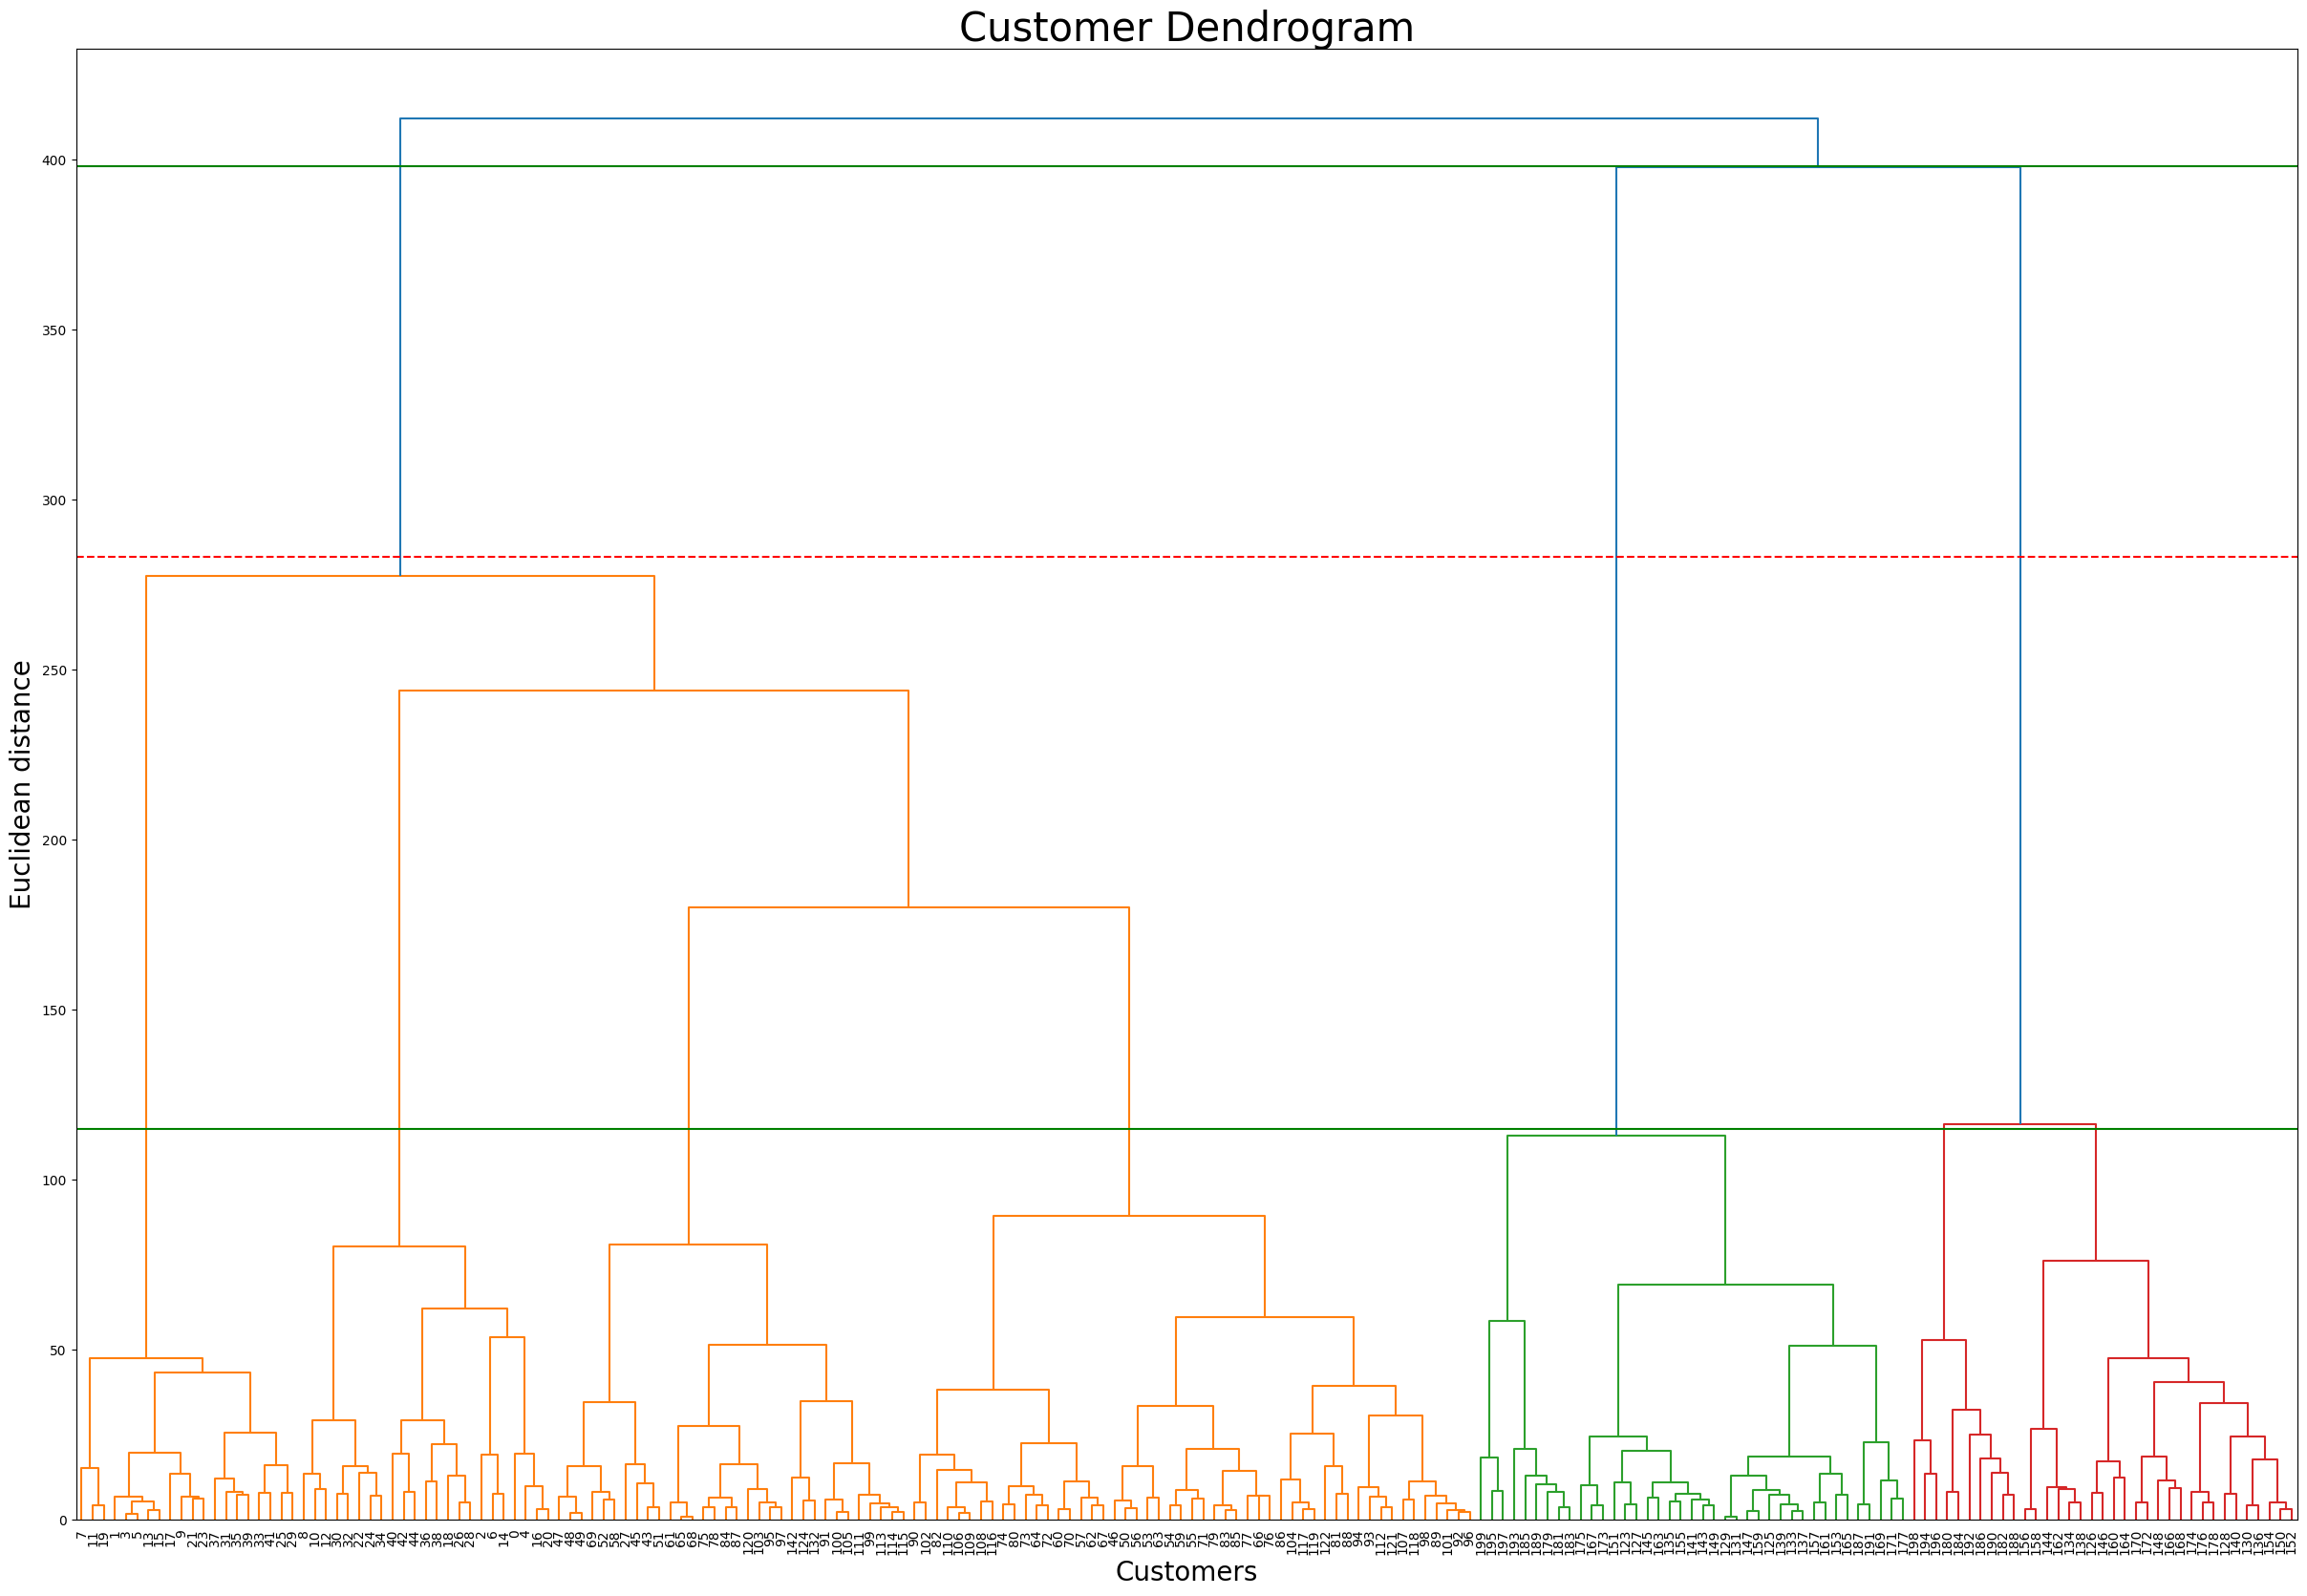

In [ ]:
# Create a Matplotlib figure with a size of 30 inches by 20 inches.
plt.figure(figsize=(30, 20))

# Compute the dendrogram for the data matrix `X` using the Ward's linkage method.
# The `labels` argument specifies the labels for the leaf nodes of the dendrogram.
dendrogrm = sch.dendrogram(sch.linkage(X, method='ward'), labels=pca_df.index)

# Get the current axes object.
ax = plt.gca()

# Set the tick label size for the x-axis to 10 points.
ax.tick_params(axis='x', which='major', labelsize=10)

plt.axhline(y=398, color='green', linestyle='-')
plt.axhline(y=115, color='green', linestyle='-')
# Draw a horizontal line at y = 283 with a red color and a dashed linestyle.
plt.axhline(y=283, color='red', linestyle='--')

# Set the title of the plot to "Customer Dendrogram" with a font size of 30 points.
plt.title('Customer Dendrogram', fontsize=30)

# Set the x-axis label to "Customers" with a font size of 20 points.
plt.xlabel('Customers', fontsize=20)

# Set the y-axis label to "Euclidean distance" with a font size of 20 points.
plt.ylabel('Euclidean distance', fontsize=20)

# Display the plot.
plt.show()

In our case, it's 3. So let's fit our Agglomerative model with 3 clusters

In [ ]:
#Create an AgglomerativeClustering object with 3 clusters, using the Euclidean distance metric and Ward's linkage criterion.
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

# Fit the AgglomerativeClustering object to the data and predict the cluster labels
y_hc = hc.fit_predict(X)

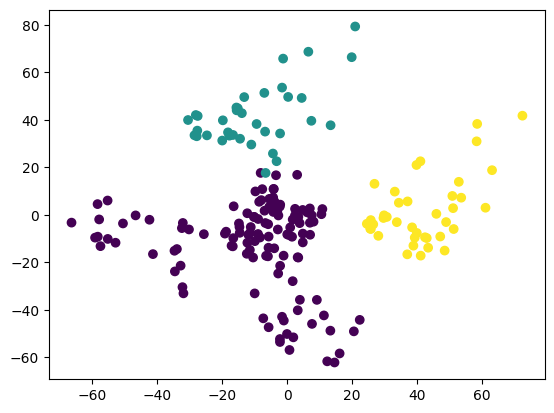

In [ ]:
# Create a scatter plot of the data matrix X, colored by the cluster labels predicted by the AgglomerativeClustering object hc, using the viridis colormap.
plt.scatter(X[:,0],X[:,1], c= hc.labels_, cmap='viridis')
plt.show()

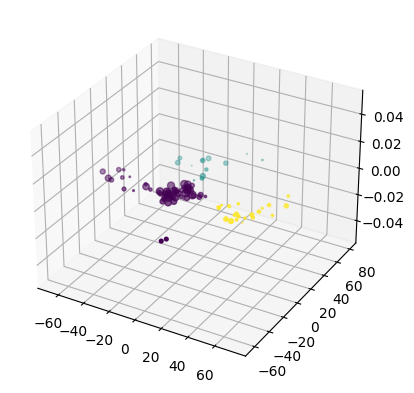

In [ ]:
# Create a figure and a 3D subplot
fig = plt.figure()
ax= fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot of the customer data, colored by cluster label
plt.scatter(X[:,0],X[:,1], X[:,2],c= hc.labels_, cmap='viridis')

## **4.3) DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

In [ ]:
X = pca_df

In [ ]:
X = pd.DataFrame(X)
X

,0,1,2
0,-31.869945,-33.001252,-22.142987
1,0.764494,-56.842901,-10.542634
2,-57.408276,-13.124961,-28.750964
3,-2.168543,-53.478590,-9.511588
4,-32.174085,-30.388412,-10.225069
...,...,...,...
195,58.352515,31.017542,3.200135
196,19.908001,66.446108,1.242664
197,58.520804,38.346039,-0.834218
198,20.979130,79.376405,-13.645474


In [ ]:
# Evaluating the optimum values of Hyperparameters

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

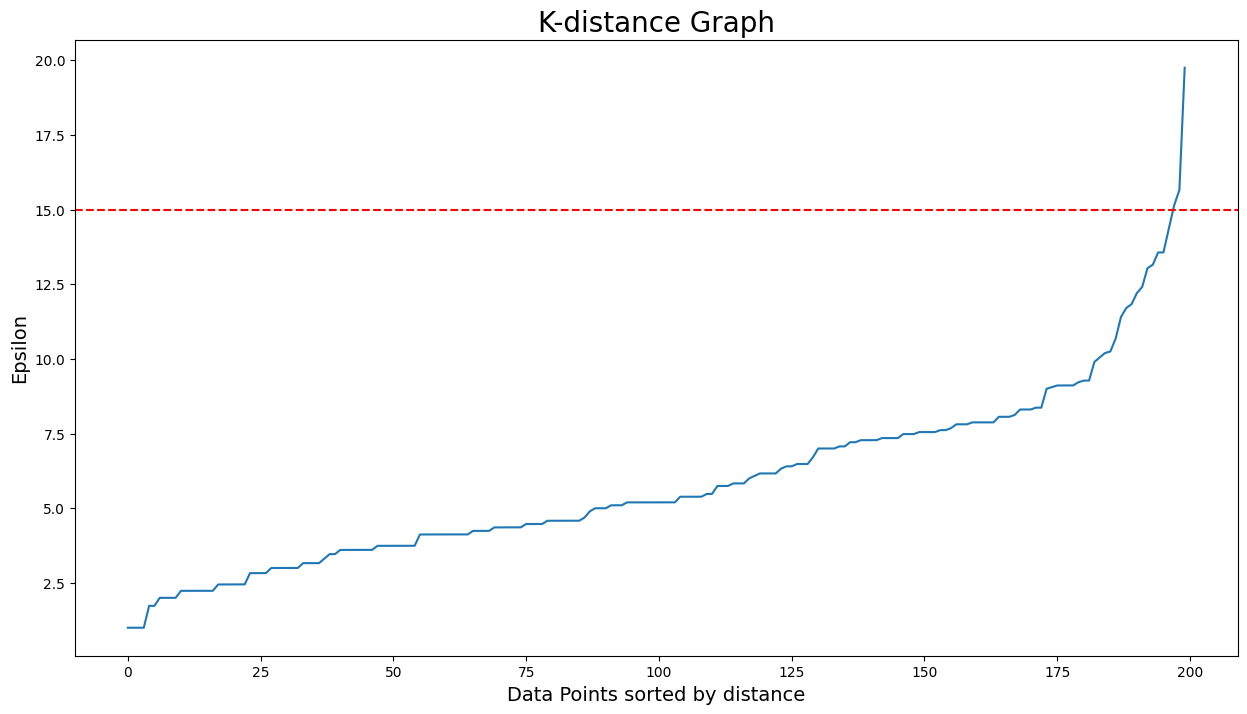

In [ ]:
# Plotting K-distance Graph

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=15, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [ ]:
eps=15
for min_samples in [10, 11, 12, 13]:
 clusterer = DBSCAN(eps=eps, min_samples=min_samples)
 cluster_labels = clusterer.fit_predict(X)
 x= cluster_labels +2
 y = np.bincount(x)
 ii = np.nonzero(y)[0]
 results = list(zip(ii,y[ii]) )
 print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)

eps= 15 | min_samples=  10 | obtained clustering:  [(1, 45), (2, 106), (3, 32), (4, 17)]
eps= 15 | min_samples=  11 | obtained clustering:  [(1, 48), (2, 19), (3, 86), (4, 32), (5, 15)]
eps= 15 | min_samples=  12 | obtained clustering:  [(1, 53), (2, 18), (3, 85), (4, 32), (5, 12)]
eps= 15 | min_samples=  13 | obtained clustering:  [(1, 66), (2, 17), (3, 85), (4, 32)]


In [ ]:
dbscan_opt=DBSCAN(eps=11,min_samples=15)
dbscan_opt.fit(X[[0,1]])

DBSCAN(eps=11, min_samples=15)

In [ ]:
X['DBSCAN_opt_labels']=dbscan_opt.labels_
X['DBSCAN_opt_labels'].value_counts()

 0    84
-1    71
 1    26
 2    19
Name: DBSCAN_opt_labels, dtype: int64

Silhouette Coefficient: 0.181


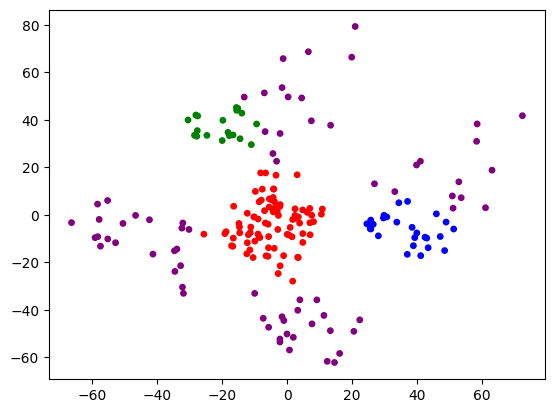

In [ ]:
colors=['purple','red','blue','green']
plt.scatter(X[0], X[1], c=X['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, X['DBSCAN_opt_labels']))

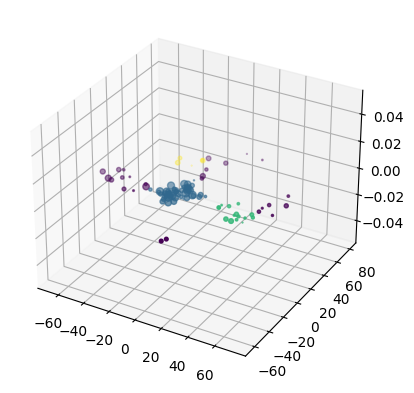

In [ ]:
# Create a figure and a 3D subplot
fig = plt.figure()
ax= fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot of the customer data, colored by cluster label
plt.scatter(X[0],X[1], X[2],c= dbscan_opt.labels_, cmap='viridis')

### ***Evaluating the optimum values of Hyperparameters***